In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
# from sklearn.metrics  import 

In [55]:
iris=sns.load_dataset('iris')

In [56]:
iris.isna().head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [57]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

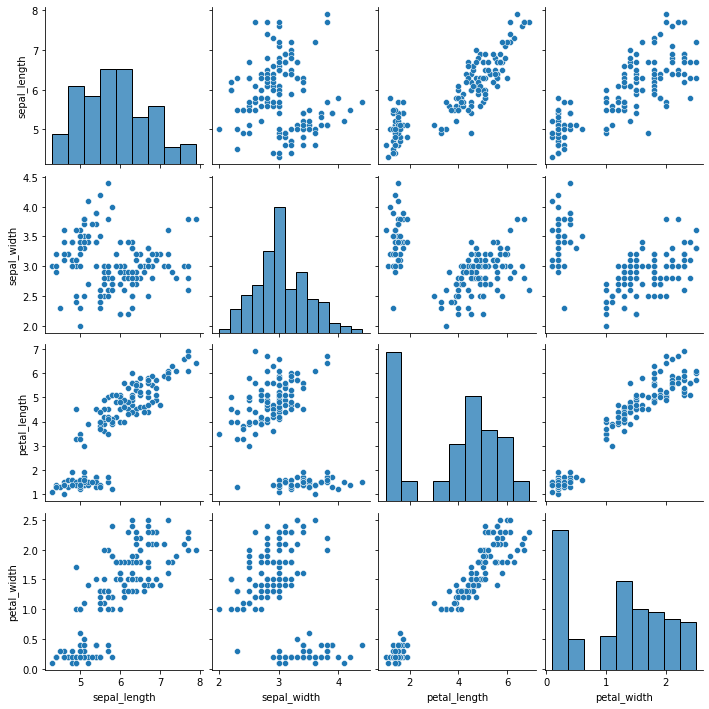

In [60]:
sns.pairplot(iris)

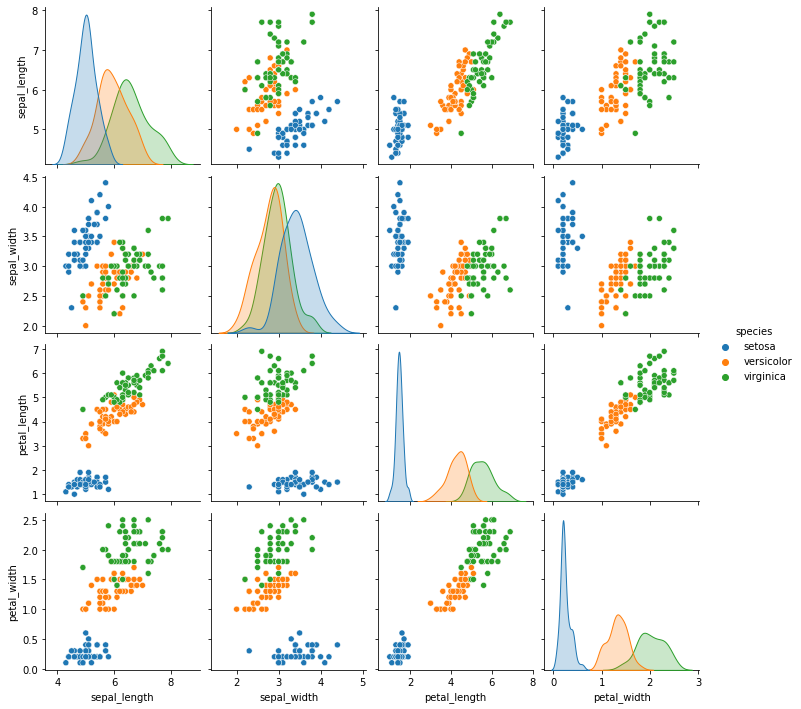

In [61]:
sns.pairplot(iris,hue='species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

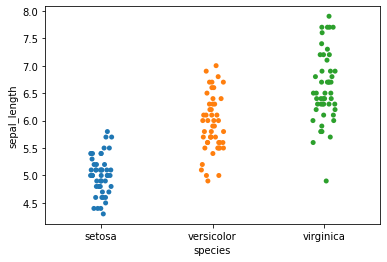

In [62]:
sns.stripplot(x='species',y='sepal_length',data= iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

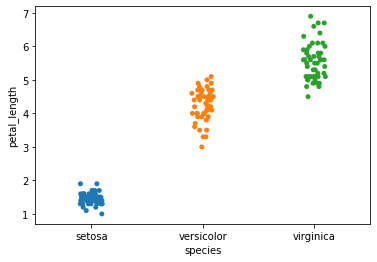

In [63]:
sns.stripplot(x='species',y='petal_length',data= iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

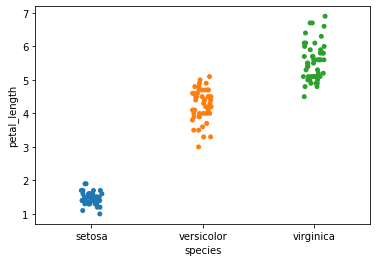

In [64]:
sns.stripplot(x='species',y='petal_length',data= iris)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

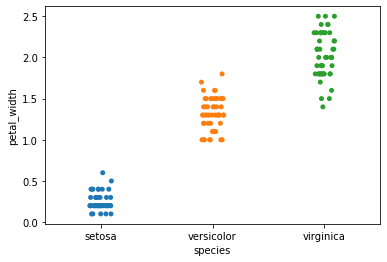

In [65]:
sns.stripplot(x='species',y='petal_width',data= iris)

In [66]:
X=iris.iloc[:,[2,3]].values
Y=iris.iloc[:,-1].values

In [67]:
print(X.shape,Y.shape)

(150, 2) (150,)


In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               Y ,
                                               test_size= 0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 2) (30, 2) (120,) (30,)


# KNNeighbours algorithm

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# How to choose K?
Practioner's rule is sqrt(no. of obvervations)

In [76]:
120**0.5

10.954451150103322

In [77]:
# create a instance of the class
model= KNeighborsClassifier(n_neighbors=11)
model.fit(X_test,Y_test)
model.score(X_test,Y_test)

0.9666666666666667

In [94]:
accuracy_score=[]
for k in range(2,21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_test,Y_test)
    accuracy_score.append(round(model.score(X_test,Y_test),2))

In [95]:
accuracy_score

[0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.97,
 0.93,
 0.97,
 0.97,
 0.97,
 0.9,
 0.9,
 0.9,
 0.9,
 0.73,
 0.73,
 0.73,
 0.73,
 0.73]

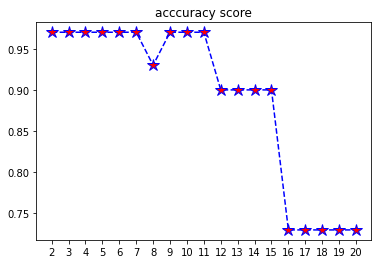

In [96]:
plt.plot(range(2,21),accuracy_score,color='b', ls='--',mfc='r',marker='*',ms='12')
plt.title('acccuracy score')
plt.xticks(range(2,21))
plt.xlabel('k values')
plt.ylbel()
plt.show()

# cross validaation

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
model.fit(X,Y)
scores=cross_val_score(model,X,Y)
print(scores.mean())

0.96


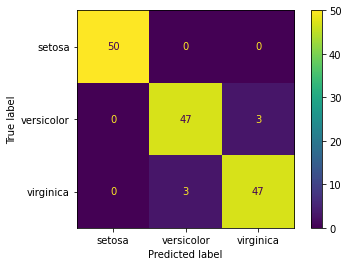

In [100]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(model,X,Y)

In [101]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(Y_test,model.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      0.89      0.89         9
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

